<a href="https://colab.research.google.com/github/chabpre/dataprovisual/blob/main/Exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam 3


References used:

https://github.com/nurfnick/Data_Viz/

https://github.com/chabpre/dataprovisual

https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

https://seaborn.pydata.org/

I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course



A: Store the data as a pandas dataframe. Find your favorite ‘club’ or ‘nationality’ (that is present in thedata!), include a picture that represents them and include it in your notebook. (If no favorite, just pick one!)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/worldCupPlayer.csv')
df

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,0,4.9,75.4,0.2,9,8.21,Morocco
1,2,2,Alireza Jahanbakhsh,AZ Alkmaar,24,33,2840,21,12,3,0,4.3,73.4,0.7,14,8.20,Iran
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90,Mexico
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,0,1.9,87.0,1.9,2,7.45,Denmark
4,10,25,Santiago Arias,PSV Eindhoven,26,30,2664,3,6,5,0,1.5,82.3,1,2,7.25,Colombia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1150,200,Giancarlo Gonzalez,Bologna,30,22,1858,0,0,4,2,-,80.6,2.4,0,6.63,Costa Rica
599,1152,217,Stephan Lichtsteiner,Juventus,34,21(6),1715,0,2,6,0,0.1,82.2,0.9,0,6.59,Switzerland
600,1154,235,Dawid Kownacki,Sampdoria,21,6(16),811,5,1,0,0,1,75.4,1.4,0,6.51,Poland
601,1156,265,Emil Hallfredsson,Udinese,33,8(11),761,0,0,5,0,0.1,88.5,0.6,0,6.39,Iceland


I don't have a favorite club so i am justing to pick the first club that is on the list and it is Ajax 
![link text](https://upload.wikimedia.org/wikipedia/sco/7/79/Ajax_Amsterdam.svg)

B: Show a table with all the data about your favorite club or nationality. Include some description about
an interesting fact in the data.

In [3]:
# filtering the rows with string "Manchester United"
df1 = df[df['club'].str.contains('Ajax')]
df1

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,0,4.9,75.4,0.2,9,8.21,Morocco
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,0,1.9,87.0,1.9,2,7.45,Denmark
10,22,160,Kasper Dolberg,Ajax,20,11(12),1143,6,0,0,0,2,78.1,0.5,0,6.69,Denmark


C: Create a histogram of the ‘Goals’

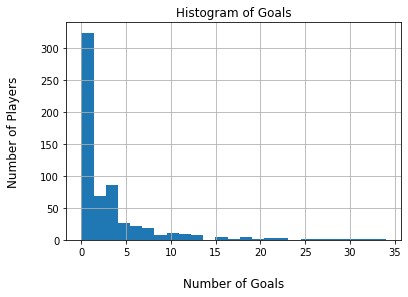

In [4]:
ax = df.Goals.hist(bins = 25)
ax.set(title = "Histogram of Goals")
ax.set_xlabel("Number of Goals", labelpad=20, size=12)
ax.set_ylabel("Number of Players", labelpad=20, size=12)
plt.show()

D: Create a histogram of the ‘Goals’ and ‘Assists’ on the same axis.

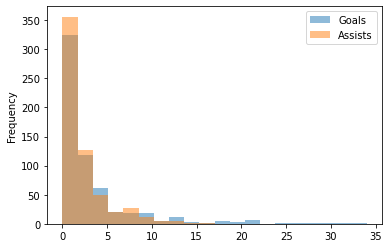

In [5]:
df[['Goals','Assists']].plot.hist(alpha = 0.5, bins = 20)

E: Create a barchart for most goals scored by nationality

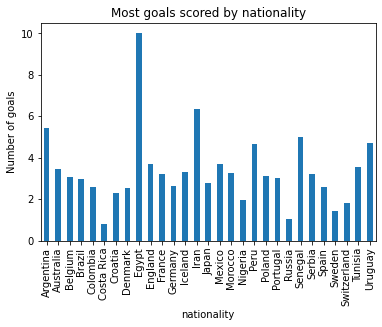

In [6]:
ax = df.groupby('nationality').Goals.agg('mean').plot(kind = 'bar')
ax.set(title = "Most goals scored by nationality")
ax.set(ylabel = 'Number of goals')
plt.show()

F: Create a boxplot of ‘Yel’ (yellow cards) by nationality

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'yellow cards')

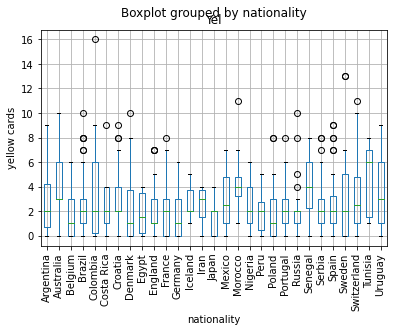

In [7]:
bp = df.boxplot(column=['Yel'], by = 'nationality', rot = 90)
bp.plot()
plt.xlabel('nationality')
plt.ylabel('yellow cards')

G: Create ‘Goals’ and ‘Assists’ as scatter. Signify your favorite club or nationality in some way on the scatterplot. You may need to add a new column to the dataset to do so

Text(0.5, 1.0, 'A scatterplot of goals and assists')

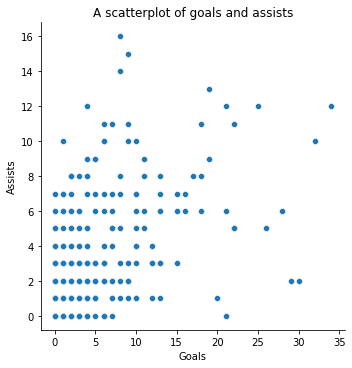

In [8]:
sns.relplot(data=df, x = 'Goals', y= 'Assists' )
plt.title('A scatterplot of goals and assists')

The following is to help create a scatterplot that will have the goals and assist split in a way that you can know which ones are which.

In [11]:
def AjaxGoals(row):
  return row.Goals

def AjaxAssists(row):
  return row.Assists

In [12]:
df2 = df[df['club'].str.contains('Ajax')]

df['Ajax_goals'] = df2.apply(lambda row: AjaxGoals(row), axis=1)

df['Ajax_assists'] = df2.apply(lambda row: AjaxAssists(row), axis=1)

In [13]:
df['Ajax_goals'] = df['Ajax_goals'].fillna(0).astype(int)
df['Ajax_goals'] = df['Ajax_goals'].astype('int')
df['Ajax_assists'] = df['Ajax_assists'].fillna(0).astype(int)
df['Ajax_assists'] = df['Ajax_assists'].astype('int')

In [14]:
df[df['club'].str.contains('Ajax')]

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,...,SpG,PS,AerialsWon,MotM,Rating,nationality,MUFC_goals,MUFC_assists,Ajax_goals,Ajax_assists
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,...,4.9,75.4,0.2,9,8.21,Morocco,NaN,NaN,9,15
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,...,1.9,87.0,1.9,2,7.45,Denmark,NaN,NaN,10,3
10,22,160,Kasper Dolberg,Ajax,20,11(12),1143,6,0,0,...,2,78.1,0.5,0,6.69,Denmark,NaN,NaN,6,0


Taking the function that is created above and apply it to the scatter plot below

Text(0.5, 1.0, 'A scatterplot of goals and assist')

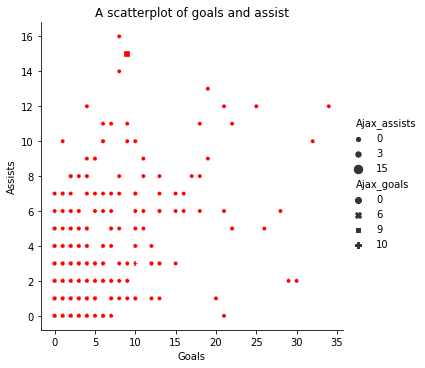

In [17]:
sns.relplot(data = df, x = 'Goals', y = 'Assists', color = 'red', style = 'Ajax_goals', size = 'Ajax_assists')

plt.title('A scatterplot of goals and assist')

H: Create stacked barplot of goals and assists of French National Team. (they won this tourney!) Be sure to comment on why it is appropriate to stack goals and assists.


In [18]:
df3 = df[df['nationality'].str.contains('France')]

Text(0, 0.5, 'Assists')

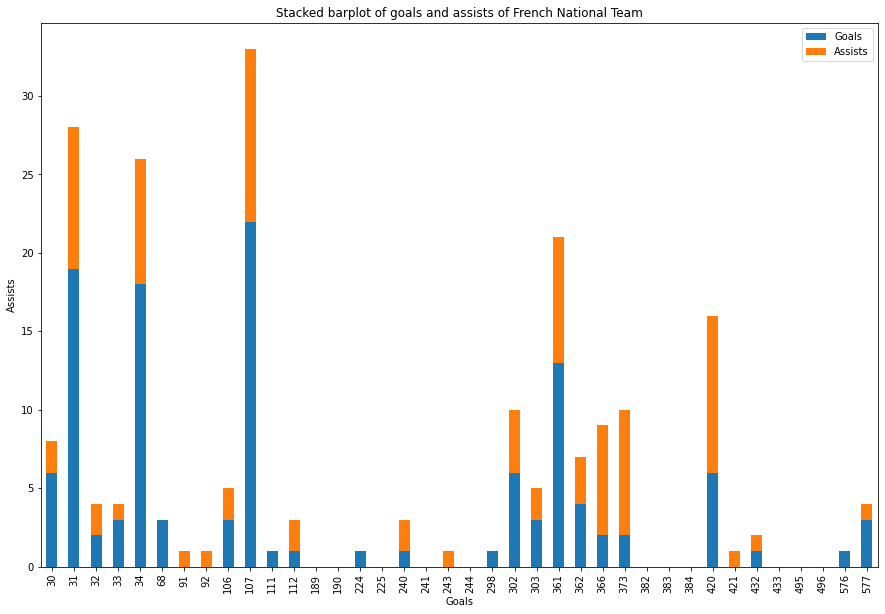

In [21]:
ax = df3[['Goals', 'Assists']].plot(kind = 'bar', stacked = True,figsize=(15, 10) , title = 'Stacked barplot of goals and assists of French National Team')
ax.set_xlabel('Goals')
ax.set_ylabel('Assists')

I think that a Box plot stacked is good to have when you have multiple sets you don't have duplicate numbers.

I: Create a correlation heatmap of the entire dataset.

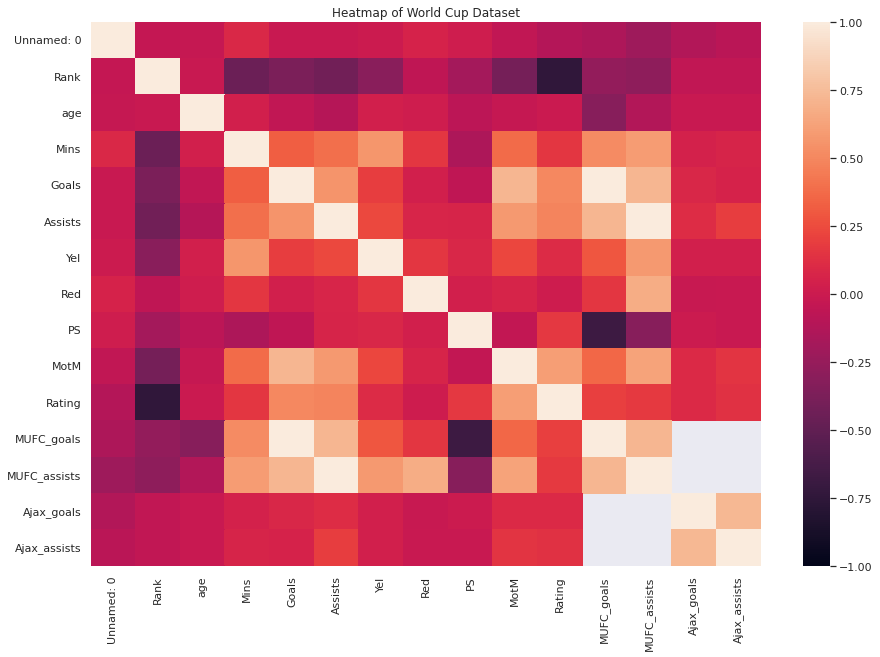

In [23]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(df.corr(),vmin = -1, annot=False)
ax.set(title = 'Heatmap of World Cup Dataset')
plt.show()

2: Questions about the exam

A: I say that i took about an hour and a half to do this exam

B: The harder part for me was doing the function for the scatterplot to split the two but other than that it just plots that do most of the stuff for you, you just have to clarify what you want in the plot and what plot you want.

C: I think I am good on everything that we covered up to this exam.